In [1]:
!pip install intersect

In [ ]:
#this function returns the refractive index of the cladding material, AlxGa1-xAs, which is an alloy between GaAs and AlAs with fractional aluminium content x
def nx(x):
  return 3.59-0.71*x+0.091*x**2
print(nx(1))


2.971


<ipython-input-4-128038357a99>:22: RuntimeWarning: invalid value encountered in divide
  y3 = -x/np.tan(x)


0.4998006502255234 0.05 0.99


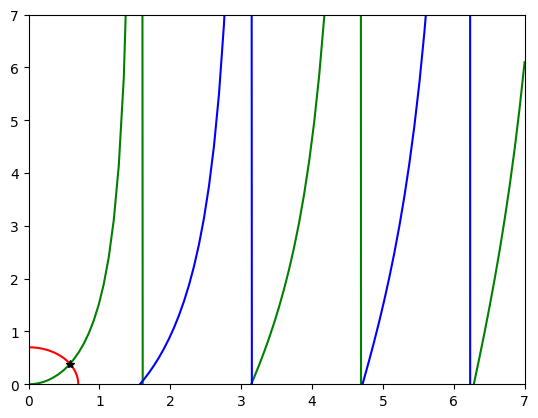

0.500182651999808 0.11 0.17


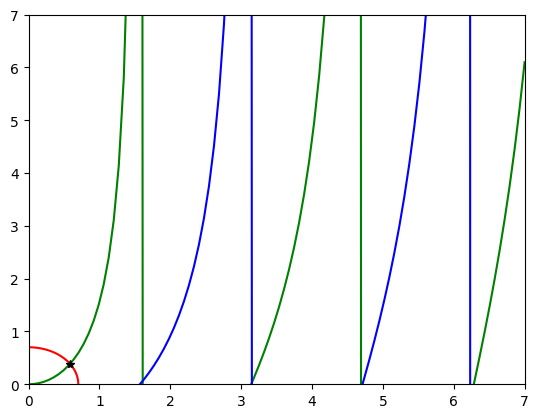

0.49942837609150115 0.13 0.12


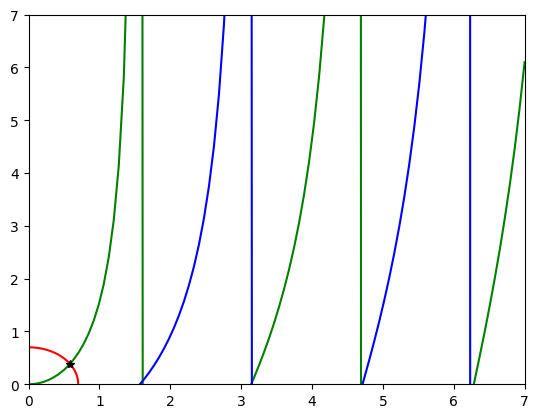

0.5008442332358243 0.15 0.09


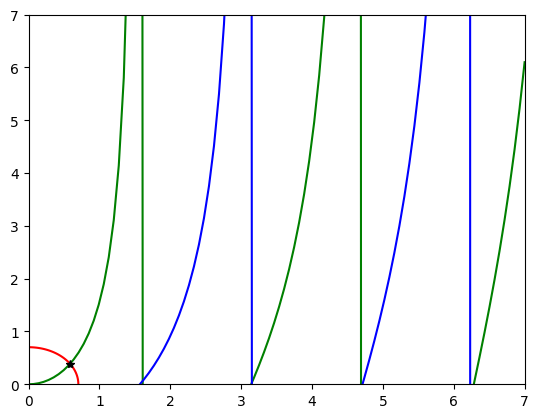

0.49995843408976365 0.2 0.05


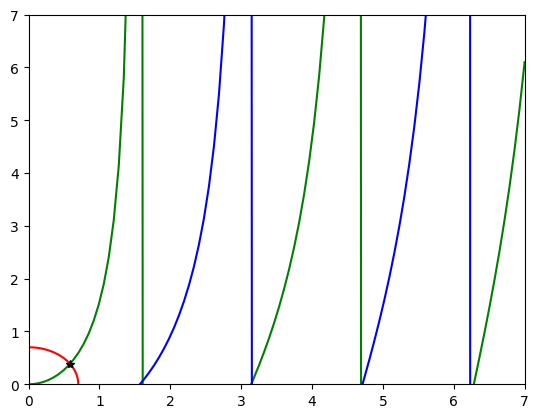

In [ ]:
from intersect import intersection
import numpy as np
import matplotlib.pyplot as plt
#try different values of width in the range 2um to 300um (a = 1 => 150)
#try all aluminium fractions from 0 to 100%

for a in range(1,150,1):
  for k in range(1,100,1):
    b = a*0.01
    j=k*0.01
    #compute relevant quantities needed for graphical solution of waveguide equations
    r=np.sqrt((b**2)*((2*np.pi/0.9)**2)*(3.59**2-(nx(j)**2)))
    #this condition checks single mode operation
    if (r > np.pi/2.0):
      continue
    else:
      #solve waveguide equations graphically
      x = np.linspace(0, 7, 100)
      theta=np.linspace(0,np.pi/2.0,100)
      x1 = r*np.cos(theta)
      y1 = r*np.sin(theta)

      x2 = x
      y2 = x*np.tan(x)

      x3=x
      y3 = -x/np.tan(x)
      x, y = intersection(x1, y1, x2, y2)
      x4, y4 = intersection(x1, y1, x3, y3)
      #calculate the confinement factor according to formula given in the pdf
      confine=(1+(y[0]/r**2))/(1+1/y[0])
      if (np.abs(confine-0.5)<1E-3):
        print(confine,b,j)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.set_xlim(0,7)
        ax.set_ylim(0,7)
        ax.plot(x1,y1,c="r")
        ax.plot(x2,y2,c="g")
        ax.plot(x3,y3,c="b")
        ax.plot(x,y,"*k")
        plt.show()
